<a href="https://colab.research.google.com/github/jukamt/project_ai/blob/main/NhandienKhuonMat_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import cv2
import keras
import tensorflow as tf
import pandas as pd
import glob
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from random import randint
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization,  Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.linear_model import Perceptron
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/Dataset_AI/KHUONMAT/train',target_size=(150,150), batch_size=40, class_mode='categorical')

Found 90 images belonging to 3 classes.


In [7]:
training_set.class_indices


{'KHANG': 0, 'TIEN': 1, 'TRI': 2}

In [8]:
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [10]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(training_set, epochs = 100, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=15)])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 51ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 96ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 56ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 96ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 59ms/step - loss: 0.0000e+00 - accuracy

In [11]:
model.save('CNN_KHUONMAT.h5')


In [12]:
from keras.models import load_model
CNN_emotion =load_model('CNN_KHUONMAT.h5')

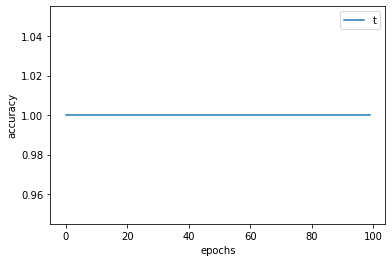

In [13]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend('train')
plt.show()

1
TIEN


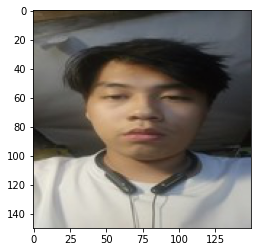

In [14]:
img_path = '/content/drive/MyDrive/Dataset_AI/KHUONMAT/test/tien_09.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
emotion=np.argmax(CNN_emotion.predict(img),axis=1)
pred = model.predict(img)
classes = ['TRI', 'TIEN', 'KHANG']
print(np.argmax(pred))
if emotion==0: print(classes[0])
elif emotion==1: print(classes[1])
elif emotion==2: print(classes[2])
elif emotion==3: print(classes[3])
elif emotion==4: print(classes[4])
elif emotion==5: print(classes[5])
elif emotion==6: print(classes[6])
elif emotion==7: print(classes[7])

0
TRI


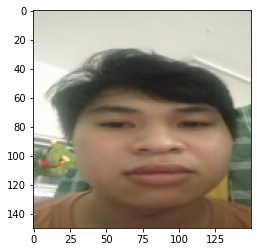

In [15]:
img_path = '/content/drive/MyDrive/Dataset_AI/KHUONMAT/test/vinhkhang_10.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
emotion=np.argmax(CNN_emotion.predict(img),axis=1)
pred = model.predict(img)
classes = ['TRI', 'TIEN', 'KHANG']
print(np.argmax(pred))
if emotion==0: print(classes[0])
elif emotion==1: print(classes[1])
elif emotion==2: print(classes[2])
elif emotion==3: print(classes[3])
elif emotion==4: print(classes[4])
elif emotion==5: print(classes[5])
elif emotion==6: print(classes[6])
elif emotion==7: print(classes[7])